In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,20)

In [2]:
df1=pd.read_csv('Bengaluru_House_Data.csv',index_col=False)
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df2=df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

In [6]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [12]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [13]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
df3[~df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [16]:
df3['x']=df3['total_sqft'].apply(is_float).values

C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df3

,location,size,total_sqft,bath,price,bhk,x
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,True
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,True
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,True
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,True
4,Kothanur,2 BHK,1200,2.0,51.00,2,True
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5,True
13316,Richards Town,4 BHK,3600,5.0,400.00,4,True
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2,True
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4,True


In [18]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [19]:
convert_sqft_to_num('2166')

2166.0

In [20]:
convert_sqft_to_num('2-4')

3.0

In [21]:
convert_sqft_to_num('34.46Sq. Meter')

In [22]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num).values

In [23]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13200 non-null  float64
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   bhk         13246 non-null  int64  
 6   x           13246 non-null  bool   
dtypes: bool(1), float64(3), int64(1), object(2)
memory usage: 737.3+ KB


In [24]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
x                 False
Name: 30, dtype: object

In [25]:
df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5

,location,size,total_sqft,bath,price,bhk,x,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,True,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,True,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,True,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,True,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,True,4250.000000
...,...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,True,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,True,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,True,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,True,10407.336319


In [26]:
len(df5.location.unique())

1304

In [27]:
df5.location=df5.location.apply(lambda x: x.strip())
location_stat=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stat

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [28]:
len(location_stat[location_stat<=10])

1052

In [29]:
location_stats_less_than_10=location_stat[location_stat<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [30]:
df5.location=df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
df5

,location,size,total_sqft,bath,price,bhk,x,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,True,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,True,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,True,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,True,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,True,4250.000000
...,...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,True,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,True,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,True,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,True,10407.336319


In [31]:
len(df5.location.unique())

242

In [32]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,x,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,True,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,True,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,True,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,True,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,True,20000.000000


In [33]:
df5.shape

(13246, 8)

In [34]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 8)

In [35]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [36]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7=remove_pps_outliers(df6)
df7.shape

(10241, 8)

In [37]:
for key,subdf in df6.groupby('location'):
    print(' ',subdf)

                    location       size  total_sqft  bath  price  bhk     x  \
210    1st Block Jayanagar      4 BHK      2850.0   4.0  428.0    4  True   
848    1st Block Jayanagar      3 BHK      1630.0   3.0  194.0    3  True   
2152   1st Block Jayanagar      3 BHK      1875.0   2.0  235.0    3  True   
2355   1st Block Jayanagar  4 Bedroom      2400.0   4.0  450.0    4  True   
4991   1st Block Jayanagar      2 BHK      1000.0   3.0   60.0    2  True   
7138   1st Block Jayanagar      3 BHK      1200.0   2.0  130.0    3  True   
7358   1st Block Jayanagar      2 BHK      1235.0   2.0  148.0    2  True   
7383   1st Block Jayanagar      4 BHK      2750.0   4.0  413.0    4  True   
8507   1st Block Jayanagar      3 BHK      1760.0   3.0  115.0    3  True   
10972  1st Block Jayanagar      4 BHK      2450.0   4.0  368.0    4  True   

       price_per_sqft  
210      15017.543860  
848      11901.840491  
2152     12533.333333  
2355     18750.000000  
4991      6000.000000  
7138  

11807  Arekere      2 BHK       900.0   2.0   44.5    2   True     4944.444444
         location       size  total_sqft  bath   price  bhk     x  \
171    Attibele      1 BHK       450.0   1.0   11.00    1  True   
265    Attibele  4 Bedroom      1600.0   4.0   52.80    4  True   
558    Attibele      2 BHK       656.0   2.0   25.00    2  True   
942    Attibele      1 BHK       400.0   1.0   11.00    1  True   
1016   Attibele      1 BHK       400.0   1.0   12.00    1  True   
1510   Attibele      1 BHK       400.0   1.0   14.00    1  True   
1644   Attibele      1 BHK       500.0   1.0   17.00    1  True   
2161   Attibele  4 Bedroom      2168.0   4.0   95.00    4  True   
2437   Attibele      1 BHK       395.0   1.0   10.25    1  True   
3241   Attibele  4 Bedroom      3640.0   4.0  275.00    4  True   
3577   Attibele      1 BHK       420.0   1.0   17.00    1  True   
4513   Attibele      3 BHK      1639.0   2.0   40.98    3  True   
4943   Attibele      1 BHK       418.0   1.0   1

           location       size  total_sqft  bath   price  bhk     x  \
21     Binny Pete      3 BHK      1755.0   3.0  122.00    3  True   
1298   Binny Pete      1 BHK       665.0   1.0   50.75    1  True   
1478   Binny Pete      3 BHK      2465.0   5.0  234.00    3  True   
1665   Binny Pete      3 BHK      1282.0   3.0  178.00    3  True   
2037   Binny Pete      2 BHK      1245.0   2.0   86.28    2  True   
2858   Binny Pete      1 BHK       660.0   1.0   54.00    1  True   
2918   Binny Pete      2 BHK      1350.0   2.0   91.00    2  True   
3336   Binny Pete      1 BHK       665.0   1.0   46.08    1  True   
3605   Binny Pete      1 BHK       660.0   1.0   62.00    1  True   
3687   Binny Pete      2 BHK      1365.0   2.0  122.00    2  True   
3714   Binny Pete      4 BHK      2940.0   6.0  280.00    4  True   
5096   Binny Pete      3 BHK      1282.0   3.0  178.00    3  True   
6786   Binny Pete      3 BHK      1795.0   3.0  139.00    3  True   
7507   Binny Pete      3 BHK    

           location       size  total_sqft  bath  price  bhk     x  \
1713   HBR Layout      3 BHK      2800.0   2.0  200.0    3  True   
1773   HBR Layout      3 BHK      1722.0   3.0   95.0    3  True   
2067   HBR Layout  4 Bedroom      1200.0   4.0  120.0    4  True   
3899   HBR Layout      2 BHK      1200.0   2.0   60.0    2  True   
4975   HBR Layout      2 BHK      1004.0   2.0   49.0    2  True   
6106   HBR Layout      3 BHK      1783.0   3.0  125.0    3  True   
6264   HBR Layout      3 BHK      1656.0   3.0   90.0    3  True   
6880   HBR Layout      2 BHK      1089.0   2.0   60.0    2  True   
8343   HBR Layout  4 Bedroom      2400.0   5.0  320.0    4  True   
8977   HBR Layout      3 BHK      1700.0   3.0  110.0    3  True   
9099   HBR Layout      2 BHK      1198.0   2.0   65.0    2  True   
9643   HBR Layout  4 Bedroom      1200.0   4.0  115.0    4  True   
9998   HBR Layout  3 Bedroom      1800.0   2.0  230.0    3  True   
11073  HBR Layout      2 BHK      1068.0   2.0

             location       size  total_sqft  bath   price  bhk     x  \
663    Indira Nagar  4 Bedroom      2200.0   4.0   200.0    4  True   
1002   Indira Nagar      2 BHK      1200.0   2.0    93.0    2  True   
1128   Indira Nagar      2 BHK      1128.0   2.0   105.0    2  True   
1774   Indira Nagar      3 BHK      2800.0   3.0   330.0    3  True   
2066   Indira Nagar      3 BHK      1650.0   3.0   200.0    3  True   
3249   Indira Nagar      3 BHK      1875.0   3.0   180.0    3  True   
3260   Indira Nagar      2 BHK      1210.0   2.0   102.0    2  True   
3308   Indira Nagar      2 BHK      1224.0   2.0   105.0    2  True   
3440   Indira Nagar  6 Bedroom      2480.0   4.0   750.0    6  True   
3486   Indira Nagar      3 BHK      2070.0   3.0   225.0    3  True   
3548   Indira Nagar  1 Bedroom       500.0   1.0    70.0    1  True   
3918   Indira Nagar      2 BHK      1400.0   2.0   168.0    2  True   
4058   Indira Nagar  4 Bedroom      2400.0   4.0   525.0    4  True   
4074

11647     8418.367347  
             location       size  total_sqft  bath   price  bhk     x  \
88     Kasavanhalli      2 BHK     1060.00   2.0   58.06    2  True   
142    Kasavanhalli      3 BHK     1563.05   3.0  105.00    3  True   
439    Kasavanhalli  3 Bedroom     1000.00   4.0  110.00    3  True   
809    Kasavanhalli      3 BHK     1717.00   3.0   99.00    3  True   
940    Kasavanhalli      3 BHK     1799.00   3.0   90.00    3  True   
...             ...        ...         ...   ...     ...  ...   ...   
11834  Kasavanhalli      3 BHK     2035.00   3.0  142.00    3  True   
12029  Kasavanhalli      3 BHK     1747.00   3.0  110.00    3  True   
12086  Kasavanhalli      2 BHK     1377.00   2.0   80.00    2  True   
12915  Kasavanhalli      2 BHK     1181.00   2.0   61.00    2  True   
13178  Kasavanhalli      2 BHK     1121.00   2.0   75.00    2  True   

       price_per_sqft  
88        5477.358491  
142       6717.635392  
439      11000.000000  
809       5765.870705  
9

            location       size  total_sqft  bath    price  bhk      x  \
216    Magadi Road  6 Bedroom      3600.0   6.0  141.000    6   True   
359    Magadi Road      2 BHK      1116.0   2.0   50.000    2   True   
537    Magadi Road      3 BHK      1282.0   2.0   49.000    3   True   
865    Magadi Road      2 BHK       884.0   2.0   41.100    2   True   
900    Magadi Road      2 BHK      1005.0   2.0   55.780    2   True   
1183   Magadi Road      2 BHK      1000.0   2.0   46.500    2  False   
1985   Magadi Road  4 Bedroom      1500.0   2.0   93.000    4   True   
2062   Magadi Road  2 Bedroom      1350.0   1.0  100.000    2   True   
2070   Magadi Road      3 BHK      1322.0   2.0   58.820    3   True   
3267   Magadi Road      2 BHK      1345.0   2.0   55.000    2   True   
4299   Magadi Road  1 Bedroom       440.0   1.0   35.000    1   True   
4356   Magadi Road  4 Bedroom      1200.0   4.0  130.000    4   True   
6144   Magadi Road      2 BHK       600.0   1.0   22.000    2 

                     location       size  total_sqft  bath   price  bhk     x  \
1399   Poorna Pragna Layout      2 BHK       920.0   2.0   39.55    2  True   
1426   Poorna Pragna Layout      3 BHK      1475.0   2.0   58.99    3  True   
2158   Poorna Pragna Layout      3 BHK      1270.0   2.0   50.79    3  True   
2921   Poorna Pragna Layout      2 BHK      1160.0   2.0   46.39    2  True   
3711   Poorna Pragna Layout      3 BHK      1270.0   2.0   50.79    3  True   
4041   Poorna Pragna Layout      3 BHK      1270.0   2.0   50.79    3  True   
4272   Poorna Pragna Layout      2 BHK       965.0   2.0   48.00    2  True   
5142   Poorna Pragna Layout      3 BHK      1355.0   2.0   58.25    3  True   
5304   Poorna Pragna Layout  3 Bedroom      1400.0   2.0  240.00    3  True   
5548   Poorna Pragna Layout      3 BHK      1355.0   2.0   58.27    3  True   
6031   Poorna Pragna Layout      3 BHK      1475.0   2.0   58.99    3  True   
6797   Poorna Pragna Layout      3 BHK      1270.0

13294     3636.363636  
          location       size  total_sqft  bath   price  bhk     x  \
296    TC Palaya  3 Bedroom      1475.0   3.0   98.00    3  True   
420    TC Palaya  2 Bedroom      1200.0   2.0   60.00    2  True   
892    TC Palaya  3 Bedroom      1200.0   2.0   66.00    3  True   
1043   TC Palaya      3 BHK      1600.0   2.0   65.00    3  True   
1051   TC Palaya  3 Bedroom      1200.0   3.0   66.00    3  True   
1069   TC Palaya  3 Bedroom      1350.0   2.0   75.00    3  True   
1249   TC Palaya  2 Bedroom      1240.0   2.0   60.00    2  True   
1300   TC Palaya  3 Bedroom      1500.0   2.0  100.00    3  True   
1784   TC Palaya  2 Bedroom      1200.0   2.0   65.00    2  True   
1804   TC Palaya  2 Bedroom      1200.0   2.0   70.00    2  True   
1867   TC Palaya  4 Bedroom      2100.0   2.0   50.00    4  True   
1877   TC Palaya  2 Bedroom       900.0   2.0   55.00    2  True   
2138   TC Palaya  3 Bedroom      1200.0   2.0   66.00    3  True   
2232   TC Palaya  3 Be

In [38]:
df7

,location,size,total_sqft,bath,price,bhk,x,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,True,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,True,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,True,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,True,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,True,11983.805668
...,...,...,...,...,...,...,...,...
10236,other,2 BHK,1353.0,2.0,110.00,2,True,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.00,1,True,3201.970443
10238,other,3 BHK,1440.0,2.0,63.93,3,True,4439.583333
10239,other,2 BHK,1075.0,2.0,48.00,2,True,4465.116279


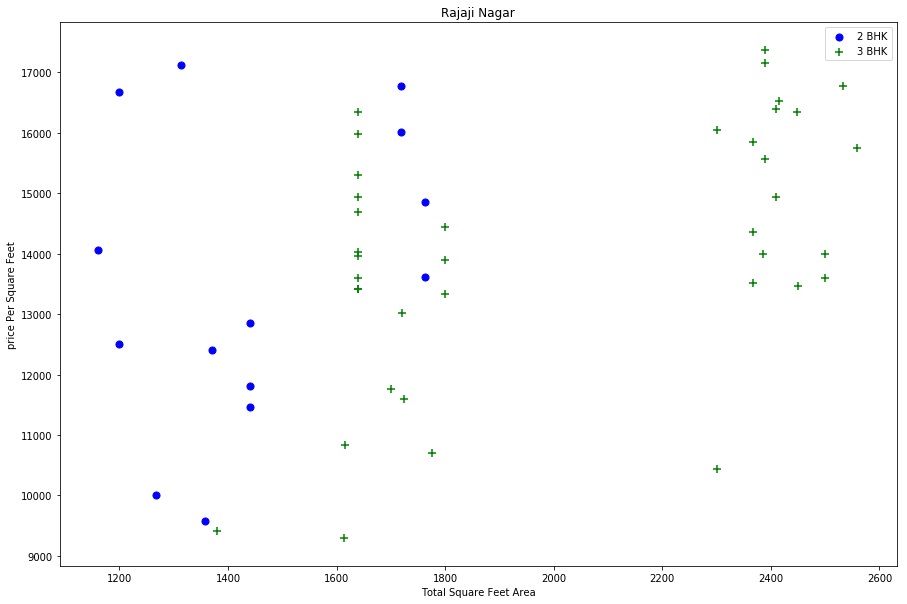

In [39]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,color='green',marker='+',label='3 BHK',s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('price Per Square Feet')
    plt.title(location)
    plt.legend()
plot_scatter_chart(df7,'Rajaji Nagar')

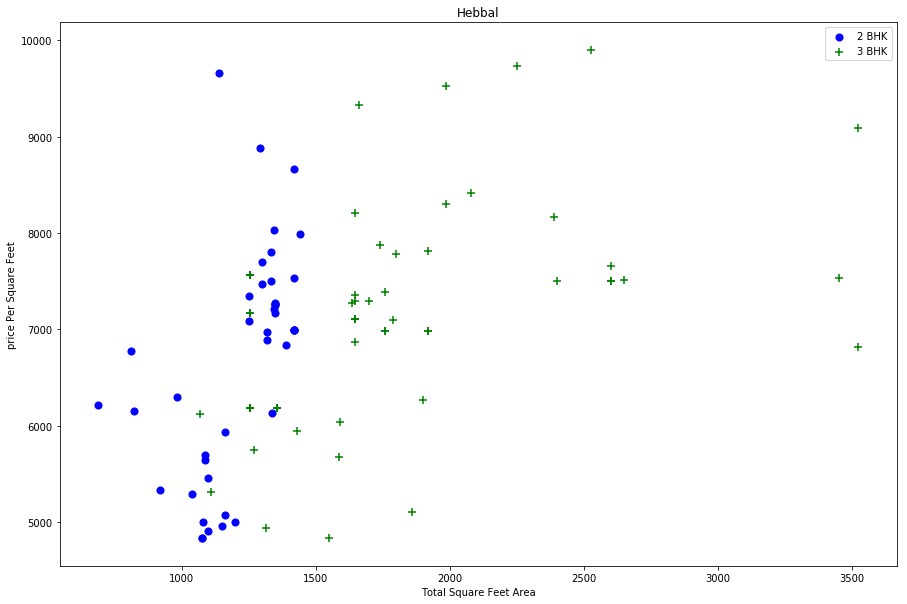

In [40]:
plot_scatter_chart(df7,'Hebbal')

In [41]:
def  remove_BHK_outlier(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby('location'):#df Group by location and creating dataframe 
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):#creating dataframe of df location groupby again bedroom groupby
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_df.price_per_sqft),#calculating mean,std of BHK from each location
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'): #creating dataframe of df location groupby again bedroom groupby
            stats =bhk_stats.get(bhk-1)# mean, std of BHK-1
            if stats and stats['count']>5:# it will continue the loop up to 4 bed
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)#checking if the mean value BHK of ppsqft is less than mean of ppsqft BHK- 
    return df.drop(exclude_indices,axis='index')# end result drop those unfair values from df
df8=remove_BHK_outlier(df7)
df8.shape

(7329, 8)

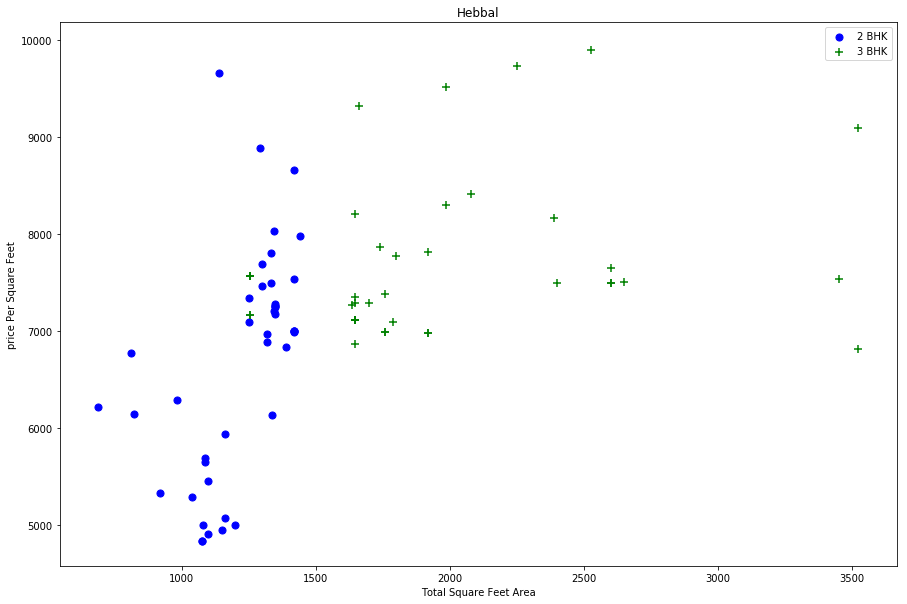

In [42]:
plot_scatter_chart(df8,'Hebbal')

Text(0, 0.5, 'Count')

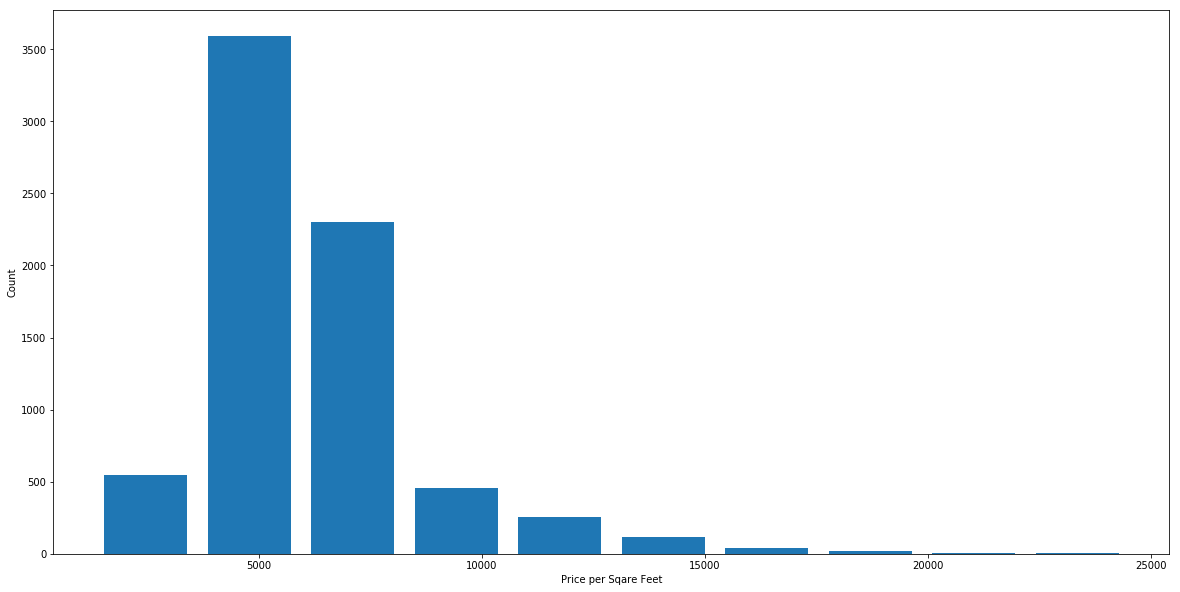

In [43]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel('Price per Sqare Feet')
plt.ylabel("Count")

In [44]:
df8.bath=df8['bath'].apply(lambda x: int(x))

In [45]:
df8.bath.unique()

array([ 4,  3,  2,  5,  8,  1,  6,  7,  9, 12, 16, 13], dtype=int64)

In [46]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,x,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12,160.0,10,True,4000.000000
8486,other,10 BHK,12000.0,12,525.0,10,True,4375.000000
8575,other,16 BHK,10000.0,16,550.0,16,True,5500.000000
9308,other,11 BHK,6000.0,12,150.0,11,True,2500.000000
9639,other,13 BHK,5425.0,13,275.0,13,True,5069.124424


Text(0, 0.5, 'Count')

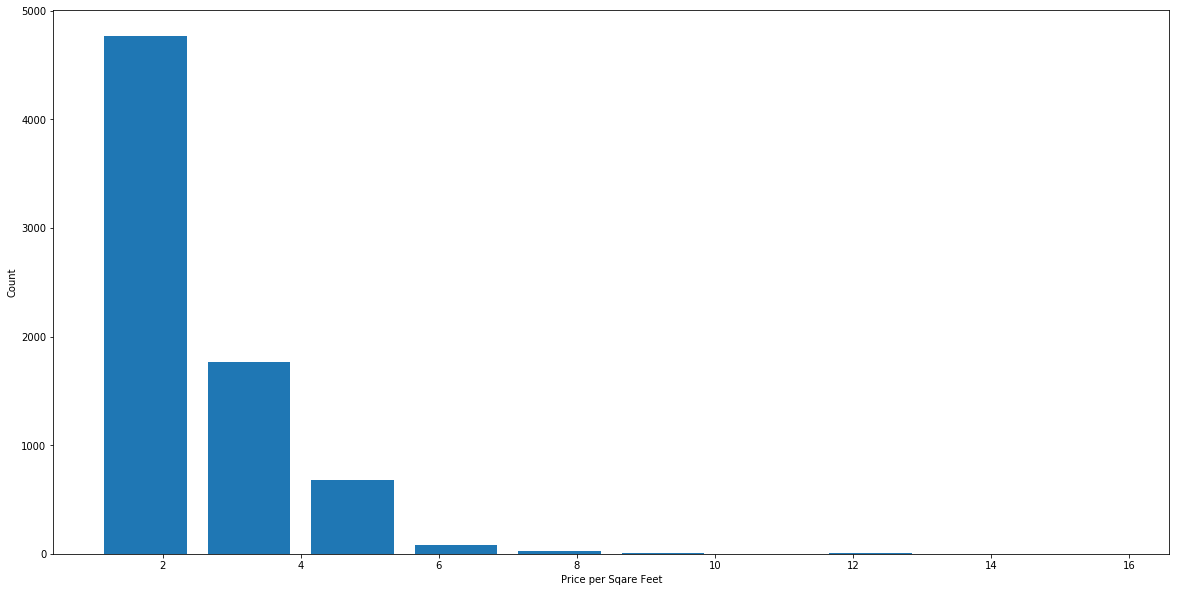

In [47]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel('Price per Sqare Feet')
plt.ylabel("Count")

In [48]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,x,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7,80.0,4,True,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8,450.0,4,True,6428.571429
6711,Thanisandra,3 BHK,1806.0,6,116.0,3,True,6423.034330
8411,other,6 BHK,11338.0,9,1000.0,6,True,8819.897689


In [49]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 8)

In [50]:
df10=df9.drop(['size','price_per_sqft','x'],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4,428.0,4
1,1st Block Jayanagar,1630.0,3,194.0,3
2,1st Block Jayanagar,1875.0,2,235.0,3
3,1st Block Jayanagar,1200.0,2,130.0,3
4,1st Block Jayanagar,1235.0,2,148.0,2


In [51]:
dummies=pd.get_dummies(df10.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [52]:
df11=pd.concat([df10.drop('location',axis='columns'),dummies.drop('other',axis='columns')],axis='columns')
df11

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df11.shape

(7251, 245)

In [54]:
x=df11.drop('price',axis='columns')
x

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
y=df11['price']
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10232     70.0
10233    200.0
10236    110.0
10237     26.0
10240    400.0
Name: price, Length: 7251, dtype: float64

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [57]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8452277697874261

In [58]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [59]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():#going through the python dictionary
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y.values)

C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previ

C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': False}
1,lasso,0.687477,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.725119,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [60]:
np.where(x.columns=='2nd Phase Judicial Layout')

(array([5], dtype=int64),)

In [61]:
np.where(x.columns=='2nd Phase Judicial Layout')[0][0]

5

In [62]:
x.columns[5]

'2nd Phase Judicial Layout'

In [63]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [64]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(x_train.values,y_train)
lr_clf.score(x_test.values,y_test)

0.8452277697874261

In [65]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(x.columns==location)[0][0]

    z = np.zeros(len(x.columns))
    z[0] = sqft
    z[1] = bath
    z[2] = bhk
    if loc_index >= 0:
        z[[loc_index]] = 1

    return lr_clf.predict([z])[0]

In [66]:
predict_price('1st Phase JP Nagar',1000,2,2)

83.4990467715936

In [67]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [68]:
import json
columns ={
    'data_columns':[col.lower() for col in x.columns]
}
with open ('columns.json','w') as f:
    f.write(json.dumps(columns))